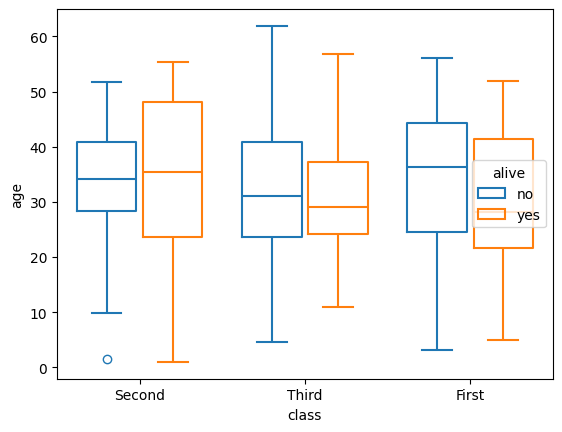

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

n = 100

# Passenger class
pclass = np.random.choice(
    ["First", "Second", "Third"],
    size=n,
    p=[0.2, 0.3, 0.5]
)

# Deck depends on class
deck_map = {
    "First":  ["A", "B", "C"],
    "Second": ["C", "D", "E"],
    "Third":  ["E", "F", "G"]
}
decks = [np.random.choice(deck_map[c]) for c in pclass]

# Base fare by class (approximate Titanic scale)
base_fare = {
    "First":  80,
    "Second": 30,
    "Third":  12
}

# Deck premium multiplier
deck_multiplier = {
    "A": 1.4, "B": 1.3, "C": 1.2,
    "D": 1.1, "E": 1.0,
    "F": 0.9, "G": 0.8
}

# Fare generation (lognormal for right skew)
fares = [
    np.random.lognormal(mean=np.log(base_fare[c] * deck_multiplier[d]), sigma=0.35)
    for c, d in zip(pclass, decks)
]

titanic = pd.DataFrame({
    "class": pclass,
    "deck": decks,
    "alive": np.random.choice(["yes", "no"], size=n, p=[0.4, 0.6]),
    "age": np.clip(
        np.random.normal(loc=30, scale=14, size=n),
        1, 80
    ).round(1),
    "fare": np.round(fares, 2)
})

# Plot (unchanged)
sns.boxplot(
    data=titanic,
    x="class",
    y="age",
    hue="alive",
    fill=False,
    gap=.1
)

plt.show()


In [2]:
# What each part of the boxplot means
# 1. The box

# The bottom of the box = 25th percentile (Q1)

# The top of the box = 75th percentile (Q3)

# The height of the box = Interquartile Range (IQR = Q3 − Q1)
# → This shows where the middle 50% of ages lie

# 2. The line inside the box

# This is the median (50th percentile)

# It shows the typical age for that group

# 3. The whiskers

# Extend to the smallest and largest values within
# 1.5 × IQR from Q1 and Q3

# They represent the normal range of the data

# 4. Outliers (if shown)

# Points beyond the whiskers

# Indicate unusually young or old passengers

<Axes: xlabel='age'>

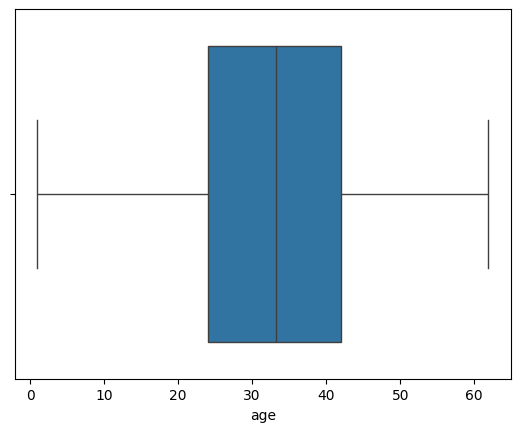

In [3]:
sns.boxplot(x=titanic["age"])

<Axes: ylabel='age'>

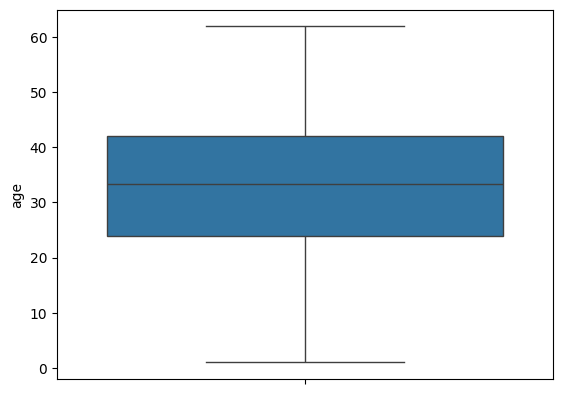

In [4]:
sns.boxplot(y=titanic["age"])

In [5]:
# What this plot shows

# It summarizes the distribution of passenger ages using five key statistics:

# 1. Median (center line)

# The line inside the box

# Represents the middle age (50% of passengers are younger, 50% older)

# 2. Box (Q1 to Q3)

# Left edge → 25th percentile (Q1)

# Right edge → 75th percentile (Q3)

# The box width represents the interquartile range (IQR)
# → the middle 50% of ages

# 3. Whiskers

# Extend to the smallest and largest ages within
# 1.5 × IQR from Q1 and Q3

# Show the normal range of ages

# 4. Outliers (if any)

# Individual points beyond the whiskers

# Represent unusually young or old passengers

<Axes: xlabel='age', ylabel='class'>

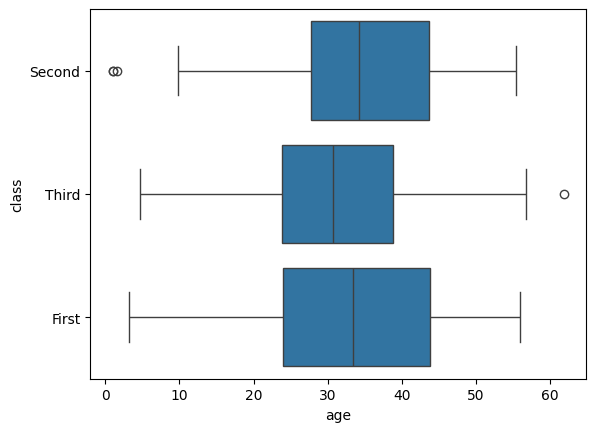

In [6]:
sns.boxplot(data=titanic, x="age", y="class")

<Axes: xlabel='class', ylabel='age'>

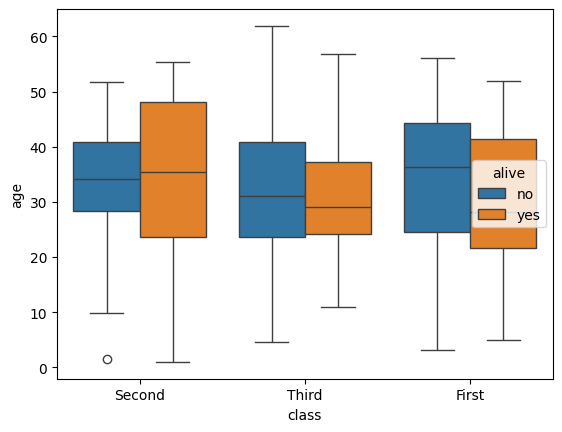

In [7]:
sns.boxplot(data=titanic, x="class", y="age", hue="alive")

<Axes: xlabel='class', ylabel='age'>

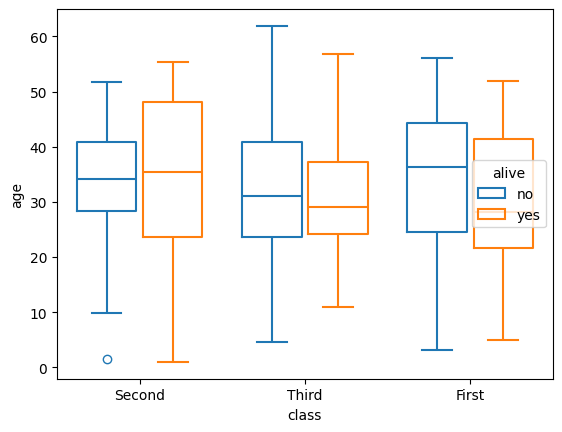

In [8]:
sns.boxplot(data=titanic, x="class", y="age", hue="alive", fill=False, gap=.1)

<Axes: xlabel='age', ylabel='deck'>

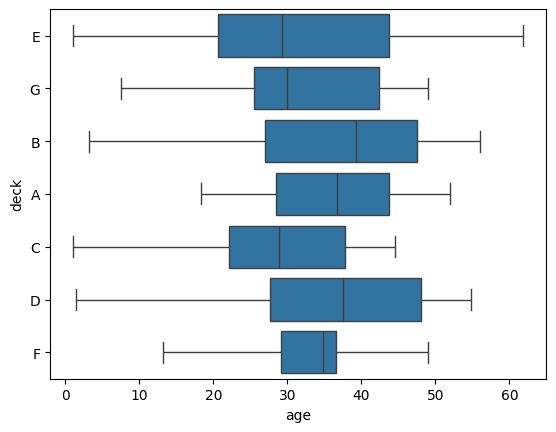

In [9]:
sns.boxplot(data=titanic, x="age", y="deck", whis=(0, 100))

<Axes: xlabel='age', ylabel='deck'>

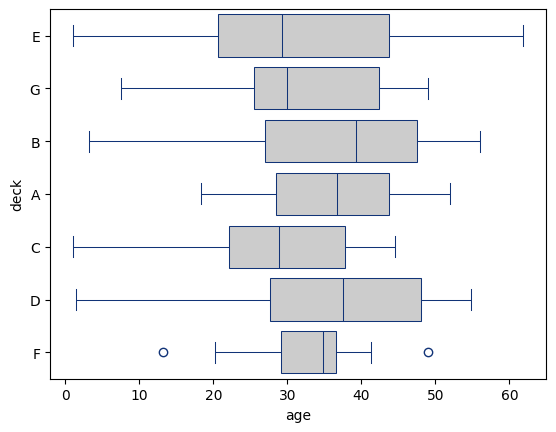

In [10]:
sns.boxplot(data=titanic, x="age", y="deck", color=".8", linecolor="#137", linewidth=.75)

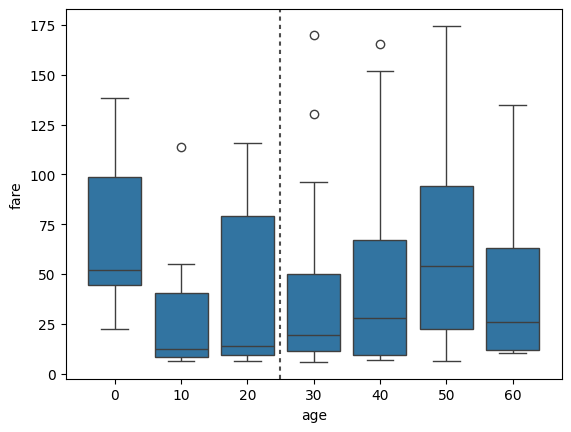

In [11]:
ax = sns.boxplot(x=titanic["age"].round(-1), y=titanic["fare"], native_scale=True)
ax.axvline(25, color=".3", dashes=(2, 2))

<Axes: xlabel='age', ylabel='class'>

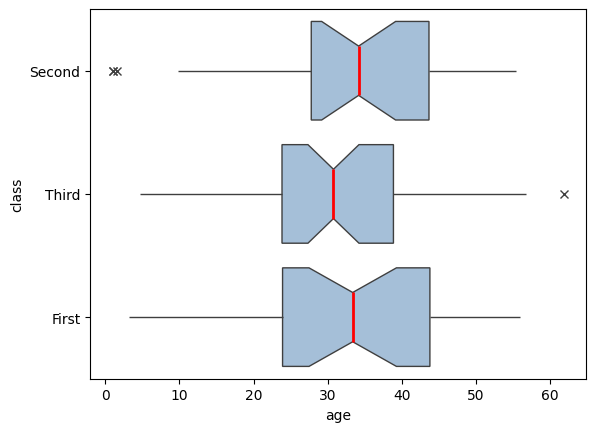

In [12]:
sns.boxplot(
    data=titanic, x="age", y="class",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)